In [2]:
import numpy as np,  pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [3]:
plantas = pd.read_excel('plantas_intermitentes_clean.xlsx', header=1)
plantas.head()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
0,1,jueves,2013-11-14,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 01:00:00
1,2,jueves,2013-11-14,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 02:00:00
2,3,jueves,2013-11-14,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 03:00:00
3,4,jueves,2013-11-14,4,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 04:00:00
4,5,jueves,2013-11-14,5,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 05:00:00


In [4]:
plantas.tail()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
46819,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
46820,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
46821,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00
46822,46823,lunes,2019-03-18,23,25575,92652.0,80384.0,60256.0,29338.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 23:00:00
46823,46824,lunes,2019-03-18,24,6344,120661.0,83692.0,35103.0,13816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-19 00:00:00


In [31]:
#36215

data2018 = plantas.loc[36216:,:]
data2018.columns = np.arange(0,len(data2018.columns))
data2018 = data2018.drop(columns=[1,2,3])
data2018.columns = np.arange(0,len(data2018.columns))
data2018.index = pd.to_datetime(data2018[17])
data2018 = data2018.drop(columns=[17])
data2018

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
17,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,36217,15550,47651.0,19313.0,342.0,8868.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,36218,25937,85267.0,29844.0,5364.0,9127.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,36219,28057,57139.0,11917.0,21413.0,12900.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,36220,40384,90004.0,35866.0,32420.0,29551.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 05:00:00,36221,43275,110309.0,81132.0,30585.0,37663.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-18 20:00:00,46820,31368,36054.0,51098.0,80381.0,108298.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-18 21:00:00,46821,31368,106540.0,78322.0,62865.0,91574.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-18 22:00:00,46822,45247,103049.0,75092.0,61188.0,57110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
planta_16 = data2018[16]
planta_16 = planta_16.dropna()
planta_16

17
2018-12-14 01:00:00    0.0
2018-12-14 02:00:00    0.0
2018-12-14 03:00:00    0.0
2018-12-14 04:00:00    0.0
2018-12-14 05:00:00    0.0
                      ... 
2019-03-18 20:00:00    0.0
2019-03-18 21:00:00    0.0
2019-03-18 22:00:00    0.0
2019-03-18 23:00:00    0.0
2019-03-19 00:00:00    0.0
Name: 16, Length: 2280, dtype: float64

In [56]:
stepwise_model = pm.auto_arima(planta_16, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=46750.724, BIC=46779.355, Time=5.737 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=48751.468, BIC=48762.921, Time=0.146 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=45670.179, BIC=45693.084, Time=10.925 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=46107.167, BIC=46130.072, Time=17.241 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=48749.510, BIC=48755.236, Time=0.108 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=48063.733, BIC=48080.912, Time=0.195 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 0, 12) (constant=True); AIC=45656.432, BIC=45685.064, Time=25.174 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 1, 12) (constant=True); AIC=45639.360, BIC=45673.717, Time=

In [6]:
plants = [data2018[i].dropna() for i in range(0,len(data2018.columns))]
plants

#plant 0 no se utiliza

[36216    36217
 36217    36218
 36218    36219
 36219    36220
 36220    36221
          ...  
 46819    46820
 46820    46821
 46821    46822
 46822    46823
 46823    46824
 Name: 0, Length: 10608, dtype: int64, 36216    15550
 36217    25937
 36218    28057
 36219    40384
 36220    43275
          ...  
 46819    31368
 46820    31368
 46821    45247
 46822    25575
 46823     6344
 Name: 1, Length: 10608, dtype: int64, 36216     47651.0
 36217     85267.0
 36218     57139.0
 36219     90004.0
 36220    110309.0
            ...   
 46819     36054.0
 46820    106540.0
 46821    103049.0
 46822     92652.0
 46823    120661.0
 Name: 2, Length: 10608, dtype: float64, 36216    19313.0
 36217    29844.0
 36218    11917.0
 36219    35866.0
 36220    81132.0
           ...   
 46819    51098.0
 46820    78322.0
 46821    75092.0
 46822    80384.0
 46823    83692.0
 Name: 3, Length: 10608, dtype: float64, 36216      342.0
 36217     5364.0
 36218    21413.0
 36219    32420.0
 36220    305

In [ ]:
model = [pm.auto_arima(plants[i], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True) for i in range(1,len(plants))]

***

***

## Test 2

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(plants[i], start_p=1, start_q=1,
                         test='adf',
                         max_p=2, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [58]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 2280
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood              -22655.549
Date:                                 Sun, 08 Mar 2020   AIC                          45325.097
Time:                                         21:48:23   BIC                          45365.181
Sample:                                              0   HQIC                         45339.722
                                                - 2280                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    376.6949     65.885      5.717      0.000     247.563     505.826
ar.L1          0.0824      0.014      5.750      0.000       0.054       0.110
ar.S.L12      -1.1243      0.071    -15.945      0.000      -1.262      -0.986
ar.S.L24      -0.1330      0.069     -1.923      0.054      -0.268       0.003
ma.S.L12       0.1782      0.028      6.410      0.000       0.124       0.233
ma.S.L24      -0.6436      0.017    -37.428      0.000      -0.677      -0.610
sigma2      2.839e+07      0.001   2.75e+10      0.000    2.84e+07    2.84e+07
===================================================================================
Ljung-Box (Q):                      379.09   Jarque-Bera (JB):              3928.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.21
Prob(H) (two-sided):                  0.54   Kurtosis:                         9.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+26. Standard errors may be unstable.
"""

In [62]:
n_periods = 24
fitted, confint = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(planta_16), len(planta_16)+n_periods)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [72]:
planta_16.index=np.arange(0,len(planta_16))
planta_16

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2275    0.0
2276    0.0
2277    0.0
2278    0.0
2279    0.0
Name: 16, Length: 2280, dtype: float64

In [65]:
fitted_series

2280      813.300660
2281      685.504029
2282     2742.916612
2283     2846.770282
2284     2077.050161
2285     2538.109171
2286     2825.642467
2287     5136.073149
2288    15572.469309
2289    25093.460180
2290    33240.704121
2291    34366.900513
2292    35548.668055
2293    31896.797137
2294    36499.612142
2295    33788.156990
2296    27613.267463
2297    22481.269528
2298    13695.984104
2299    13131.788879
2300    14211.210460
2301    15511.028370
2302    18156.777807
2303    19146.480996
dtype: float64

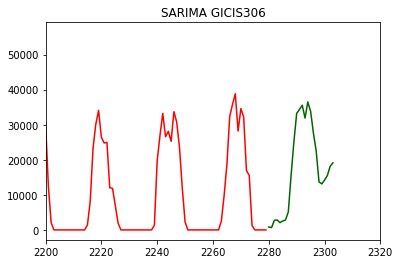

In [69]:
# Plot
#data.index = np.arange(0,780)
plt.plot(planta_16.values,'-',color='r')
plt.plot(fitted_series,'-', color='darkgreen')
plt.title("SARIMA GICIS306")
plt.xlim(2200,2320)
plt.show()

In [98]:
train = planta_16.loc[0:2013]
test = planta_16.loc[2013:]

In [99]:
planta_16[2011]

0.0

In [100]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [101]:
future_forecast = stepwise_model.predict(n_periods=24)
future_forecast = pd.DataFrame(future_forecast,index = test.index[0:n_periods])

(1990, 2040)

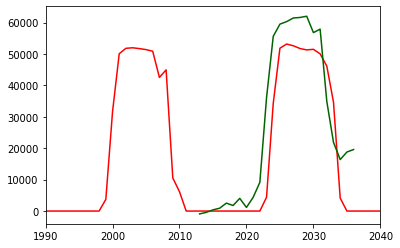

In [102]:
plt.plot(planta_16.values,'-',color='r')
plt.plot(future_forecast,'-', color='darkgreen')
plt.xlim(1990,2040)